In [1]:
print("Kernel Working fine")

Kernel Working fine


In [2]:
import os
import requests
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

/Users/atharvabot7/Downloads/MultiModal RAG using Gemini and Langchain/multimodalRAG/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

In [6]:
from langchain.vectorstores import DocArrayInMemorySearch

In [7]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [8]:
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

In [9]:
from langchain_text_splitters import CharacterTextSplitter

In [10]:
from langchain_community.vectorstores import FAISS

In [11]:
from load_dotenv import load_dotenv
load_dotenv()

True

In [12]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [13]:
import google.generativeai as genai


In [14]:
genai.configure(api_key=GOOGLE_API_KEY)

In [15]:
models = genai.list_models()

In [16]:

print("Available Gemini Models:")
for model in models:
    print(model.name)

Available Gemini Models:
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
mode

In [17]:
def load_model(model_name):
    if model_name == "gemini-2.5-pro":
        llm = ChatGoogleGenerativeAI(model="gemini-2.5-pro")
    else:
        llm = ChatGoogleGenerativeAI(model="google-pro-vision")

    return llm

In [18]:
model_text = load_model("gemini-2.5-pro")

In [19]:
model_text.invoke("who is a good football player?").content

'That\'s an excellent question! The answer depends heavily on which "football" you mean, as the word is used for two very different, very popular sports.\n\nI\'ll give you a breakdown for both **Association Football (Soccer)** and **American Football**.\n\n---\n\n### ⚽ Association Football (Soccer)\n\nThis is a very subjective topic, but players are generally considered "good" based on their skill, statistics, team success (trophies), and longevity.\n\n#### The "Greatest of All Time" Debate\n\nFor the last 15 years, the conversation has been dominated by two players who are widely considered the best to ever play the game:\n\n*   **Lionel Messi (Argentina):** An absolute magician with the ball. Famous for his incredible dribbling, vision, passing, and prolific goalscoring. He has won the Ballon d\'Or (award for the world\'s best player) a record 8 times and finally won the World Cup with Argentina in 2022.\n*   **Cristiano Ronaldo (Portugal):** A phenomenal athlete and arguably the mos

In [20]:
def get_image(url, filename, extension):
    import requests
    from PIL import Image
    
    save_path = f'{filename}.{extension}'

    content = requests.get(url).content
    with open(save_path, 'wb') as f:
        f.write(content)

    image = Image.open(save_path)
    return image


In [21]:
image = get_image("https://upload.wikimedia.org/wikipedia/commons/8/8c/Cristiano_Ronaldo_2018.jpg", "cristiano_ronaldo", "jpg")

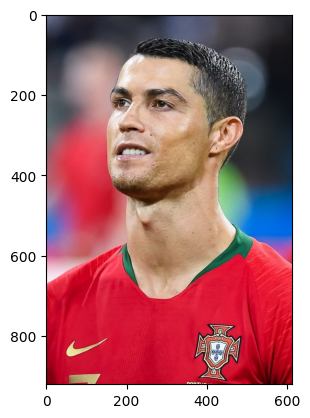

In [22]:
plt.imshow(image)
plt.show()

In [23]:
vision_model = load_model("google-pro-vision")

In [27]:
message = HumanMessage(
    content = [
        {
            "type": "image_url", "image_url": image
        }
    ]
)

In [30]:
print(vision_model.invoke([message]).content)

AttributeError: startswith